In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [2]:
# !git clone https://github.com/zalandoresearch/fashion-mnist.git

In [3]:
from tensorflow.keras.datasets import fashion_mnist

# 장수가 너무 많음 보통 메모리에 60000장 다올라와있는데 보통은 빅데이터는 조금씩 올린다. 순차적으로 하드디스크에서 메모리로올린다.
(X_train,y_train),(X_test,y_test) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [4]:
# import os
# import struct
# import sys

# from array import array
# from os import path
# import png

In [5]:
type(X_test)

numpy.ndarray

In [6]:
class_name = ['T-shirt','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','AnkleBoot']

### 시각화

In [7]:
# 시각화

samples = np.random.randint(60000,size=9)
samples

array([54864, 46749, 47682, 35779, 25102, 50056, 19234, 26546, 37235])

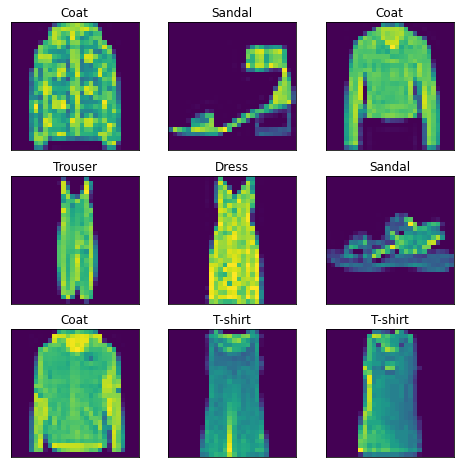

In [8]:
plt.figure(figsize=(8,8))
for i,idx in enumerate(samples):
  plt.subplot(3,3,i+1)
  plt.imshow(X_train[idx])
  plt.xticks([])
  plt.yticks([])
  plt.title(class_name[y_train[idx]])
plt.show()

### validation data

In [9]:
from sklearn.model_selection import train_test_split

X_train,X_val,y_train,y_val = train_test_split(X_train,y_train,test_size=0.3)

print(X_train.shape,X_val.shape)
print(y_train.shape,y_val.shape)

(42000, 28, 28) (18000, 28, 28)
(42000,) (18000,)


### 정규화

In [10]:
# normalization 보통 이미지는 최소-최대 정규화를 사용한다.
X_train = X_train.astype('float32')/255.
X_val = X_val.astype('float32')/255.
X_test = X_test.astype('float32')/255.

In [11]:
np.min(X_train), np.max(X_train)

(0.0, 1.0)

In [12]:
y_train[:10]

array([6, 8, 1, 4, 9, 6, 1, 4, 8, 6], dtype=uint8)

In [13]:
from tensorflow.keras.utils import to_categorical

y_train_oh = to_categorical(y_train)
y_val_oh = to_categorical(y_val)
y_test_oh = to_categorical(y_test)

In [14]:
y_train_oh

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [15]:
X_train = X_train.reshape(-1,28,28,1)
X_train.shape

(42000, 28, 28, 1)

In [16]:
X_val = X_val.reshape(-1,28,28,1)
X_test = X_test.reshape(-1,28,28,1)

### 모델

In [23]:
model = keras.Sequential([
    layers.Conv2D(filters=32,kernel_size=3,activation='relu',
                  input_shape=(28,28,1)),
    layers.MaxPool2D(pool_size=(2,2)),

    layers.Conv2D(filters=64,kernel_size=3,activation='relu'),
    layers.MaxPool2D(pool_size=(2,2)),

    layers.Flatten(),
    layers.Dense(units=32,activation='relu'),
    layers.Dense(units=10,activation='softmax')
])

model.compile(
    optimizer='rmsprop',
    loss='categorical_crossentropy',
    metrics=['acc'],
    loss_weights=None,
    run_eagerly=None,
    steps_per_execution=None,
    jit_compile=None
)

In [24]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 1600)              0         
                                                                 
 dense_2 (Dense)             (None, 32)               

In [25]:
%%time
# learning
EPOCHS = 10
BATCH_SIZE = 32
# 1 iteration = batch_size 이다. 60000장이니까 한번 배치사이즈만큼 돌려서 train_data를 모두 다 소진하면 1 epoch 이고
# 60000/32 가 1 iteration의 개수이다. 

log = model.fit(X_train,y_train_oh,
                epochs=EPOCHS,
                batch_size=BATCH_SIZE,
                validation_data=(X_val,y_val_oh))

Epoch 1/10
1313/1313 [==============================] - 7s 5ms/step - loss: 0.5430 - acc: 0.8047 - val_loss: 0.4174 - val_acc: 0.8501
Epoch 2/10
1313/1313 [==============================] - 8s 6ms/step - loss: 0.3456 - acc: 0.8747 - val_loss: 0.3351 - val_acc: 0.8815
Epoch 3/10
1313/1313 [==============================] - 6s 5ms/step - loss: 0.2953 - acc: 0.8947 - val_loss: 0.3183 - val_acc: 0.8837
Epoch 4/10
1313/1313 [==============================] - 7s 5ms/step - loss: 0.2657 - acc: 0.9041 - val_loss: 0.3256 - val_acc: 0.8820
Epoch 5/10
1313/1313 [==============================] - 7s 5ms/step - loss: 0.2420 - acc: 0.9111 - val_loss: 0.2710 - val_acc: 0.9051
Epoch 6/10
1313/1313 [==============================] - 7s 5ms/step - loss: 0.2255 - acc: 0.9188 - val_loss: 0.2645 - val_acc: 0.9081
Epoch 7/10
1313/1313 [==============================] - 7s 5ms/step - loss: 0.2086 - acc: 0.9232 - val_loss: 0.2666 - val_acc: 0.9082
Epoch 8/10
1313/1313 [==============================] - 7s 5ms

In [26]:
## 시각화

def plot_history(history):
    hist = pd.DataFrame(history.history)
    hist['epoch'] = history.epoch

    plt.figure(figsize=(16,8))
    plt.subplot(1,2,1)
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.plot(hist['epoch'], hist['loss'],label='Train Loss')
    plt.plot(hist['epoch'], hist['val_loss'],label = 'Val Loss')
    plt.legend()

    plt.subplot(1,2,2)
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.plot(hist['epoch'], hist['acc'],label='Train Accuracy')
    plt.plot(hist['epoch'], hist['val_acc'],label = 'Val Accuracy')

    plt.legend()
    plt.show()

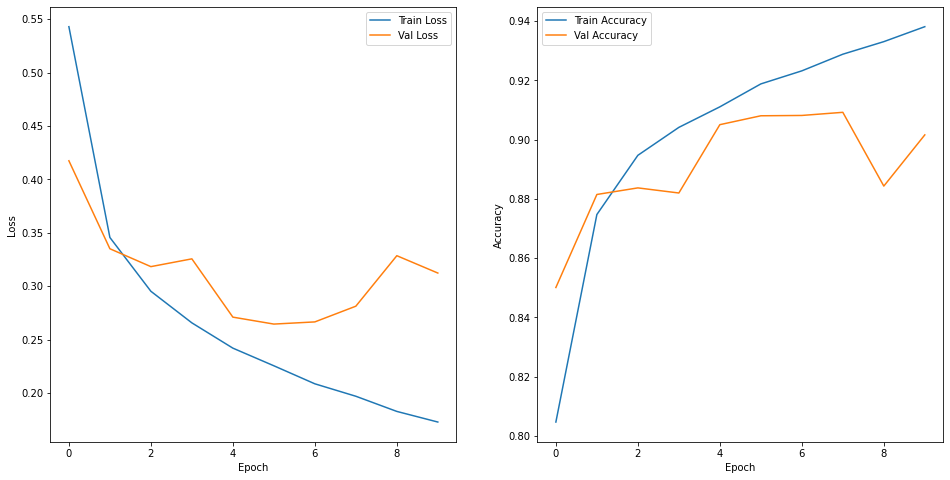

In [27]:
plot_history(log)

In [28]:
model.evaluate(X_train,y_train_oh)

1313/1313 [==============================] - 4s 3ms/step - loss: 0.1687 - acc: 0.9380


[0.16867050528526306, 0.9380238056182861]

In [29]:
model.evaluate(X_test,y_test_oh)

313/313 [==============================] - 1s 4ms/step - loss: 0.3301 - acc: 0.8963


[0.33006414771080017, 0.8963000178337097]

In [30]:
# 예측
y_pred = model.predict(X_test)
y_pred[:5]

313/313 [==============================] - 1s 2ms/step


array([[6.05448469e-11, 1.49571967e-12, 3.46384033e-10, 9.43079989e-12,
        4.98932005e-13, 2.35221137e-06, 1.51184898e-10, 8.28656175e-06,
        5.89232840e-09, 9.99989390e-01],
       [6.41303313e-06, 7.56299032e-15, 9.99974132e-01, 1.76573374e-11,
        1.79737071e-05, 8.61939562e-16, 1.41507292e-06, 2.37557305e-23,
        1.44990506e-13, 4.74046578e-20],
       [6.87650659e-10, 1.00000000e+00, 2.41564824e-11, 8.26649296e-13,
        1.25749350e-11, 1.17432024e-13, 4.68060540e-13, 1.19360110e-12,
        6.49601087e-13, 2.54994512e-18],
       [2.32131111e-12, 1.00000000e+00, 1.34197176e-11, 2.56838190e-10,
        2.57954456e-11, 1.01210866e-14, 5.55797236e-14, 6.27832611e-14,
        2.79018344e-16, 1.98358131e-19],
       [2.82194037e-02, 3.26350786e-08, 8.36675637e-04, 2.57560780e-04,
        3.48787643e-02, 6.79875484e-07, 9.35806632e-01, 1.77558335e-09,
        2.55748148e-07, 1.50225539e-08]], dtype=float32)

In [31]:
# 가장큰 값의 인덱스를 반환한다.
y_pred = np.argmax(y_pred,axis=1)
y_pred

array([9, 2, 1, ..., 8, 1, 5])

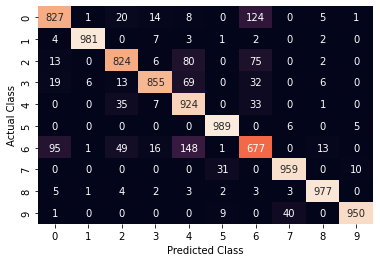

In [32]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(cf_matrix, annot=True, cbar=False,fmt='d')
plt.ylabel('Actual Class')
plt.xlabel('Predicted Class')
plt.show()

In [33]:
# 오답 이미지를 시각화

samples = np.where((y_test == y_pred) == False)[0]
samples
samples = np.random.choice(samples,9)
X_test = X_test.reshape(-1,28,28)

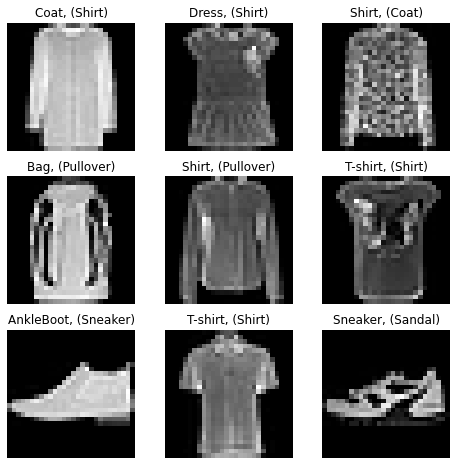

In [34]:
plt.figure(figsize=(8,8))
for i,idx in enumerate(samples):
  plt.subplot(3,3,i+1)
  plt.imshow(X_test[idx],cmap='gray')
  plt.axis('off')
  plt.title(f'{class_name[y_test[idx]]}, ({class_name[y_pred[idx]]})')
plt.show()